# Faceting: visualizing data with multi-axes subplots using SeaBorn

## 1. Introduction

In this project, we are going to be visualizing data with multi - axis subplots and building structured multi-plot grids using FacetGrid. So, basically, when analysing large datasets with multiple data variables, an efficient method is to create multiple subplots using different subsets of your data. FacetGrid allows for the easy implementation of structured multi-plot grids using the seaborn library, which is built on top of matplotlib.

## 2. Installation and setup

FacetGrid is part of the seaborn library of python and only needs seaborn library to be installed along with python 3.8 or higher. The steps for the installation is:

$Windows$ $users$:

 1. Open your cmd or powershell(assuming you have installed pip and added it to the environmental variables).
 
 2. Type pip install seaborn.
 
 3. The library should be installed and now can be used

 (errors can occur if python is not installed properly or pip is not recognized)

 fixes:
 using the terminal inside vs
 adding pip
 reinstalling python

$Mac$ $users$:
 Open the terminal in Mac. Follow the procedure below to install FacetGrid. The commands are given to the right of the colon (:) and their functionalities on the left.
 
 1. Check if Python is installed: python3 --version
    Expected output: Version.

 2. Check if pip is installed: pip3 --version
    Expected output: Version.
    Else : python3 -m ensurepip --default-pip

 3. Now, install Seaborn using pip : pip install seaborn
    Expected output: Installation.
    Else: pip install numpy pandas matplotlib

 4. You are all set to use your brand new FacetGrid and build stuff!
    Check if its installed correctly by running : python3 -c "import seaborn as sns; print(sns.__version__)"
    Expected output : Version.

## 3. Key Features, Explanations and Code

 1. $Conditional$ $multiplots$

FacetGrid allows you to represent data among subsets of your dataset for efficient analysis. This also helps with visualising the data and drawing new insights for data. FacetGrid allows comparison along the three dimensions of row, column and hue. 

This is done by first creating a FacetGrid object using a DataFrame with the arguments of 'col' and 'row' and 'hue', which will form the grid's row, column and hue. map_dataframe or map is used to plot graphs onto the grid with individual subsets of the main dataframe, which is sorted by the rows and columns of the FacetGrid object.

Below is the working code for the above theory.

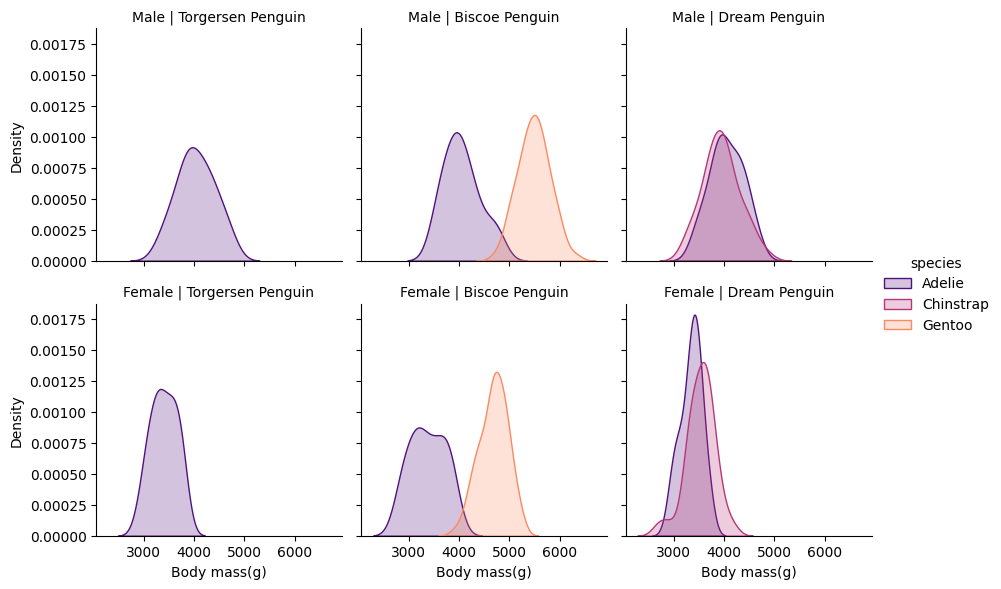

In [ ]:
import seaborn as sns
penguins_df = sns.load_dataset("penguins")
penguins_df.head()
p = sns.FacetGrid(penguins_df,col='island',row='sex',hue='species',palette='magma')
p.map_dataframe(sns.kdeplot,x='body_mass_g',fill=True)
p.set_axis_labels(x_var='Body mass(g)',y_var='Density')
p.set_titles(col_template='{col_name} Island',row_template='{row_name}')
p.add_legend()

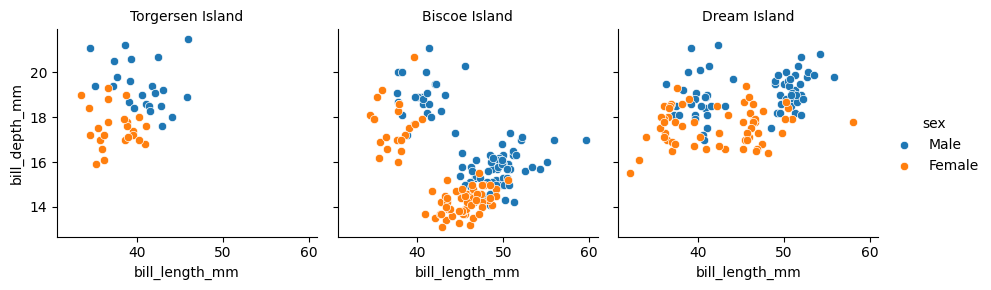

In [2]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
p = sns.FacetGrid(penguins, col='island',hue='sex')
#Creates a FacetGrid object assigned to p
p.map_dataframe(sns.scatterplot, x='bill_length_mm', y='bill_depth_mm')
#maps the object to plot and allows you add argument or custom function to you plot
p.set_axis_labels('bill_length_mm', 'bill_depth_mm')
p.set_titles(col_template='{col_name} Island',row_template='{row_name}')
p.add_legend()

2. $Using$ $Custom$ $functions$

FacetGrid also  allows you to use custom functions which are not limited to the main matplotlib or seaborn function. Facetgrid requires the custom function to follow some rules mentioned by the official documentation of Facetgrid:

1. It must plot onto the “currently active” matplotlib Axes. This will be true of functions in the matplotlib.pyplot namespace, and you can call matplotlib.pyplot.gca() to get a reference to the current Axes if you want to work directly with its methods.

2. It must accept the data that it plots in positional arguments. Internally, FacetGrid will pass a Series of data for each of the named positional arguments passed to FacetGrid.map().

3. It must be able to accept color and label keyword arguments, and, ideally, it will do something useful with them. In most cases, it’s easiest to catch a generic dictionary of **kwargs and pass it along to the underlying plotting function.

Below is the working code for the above theory.

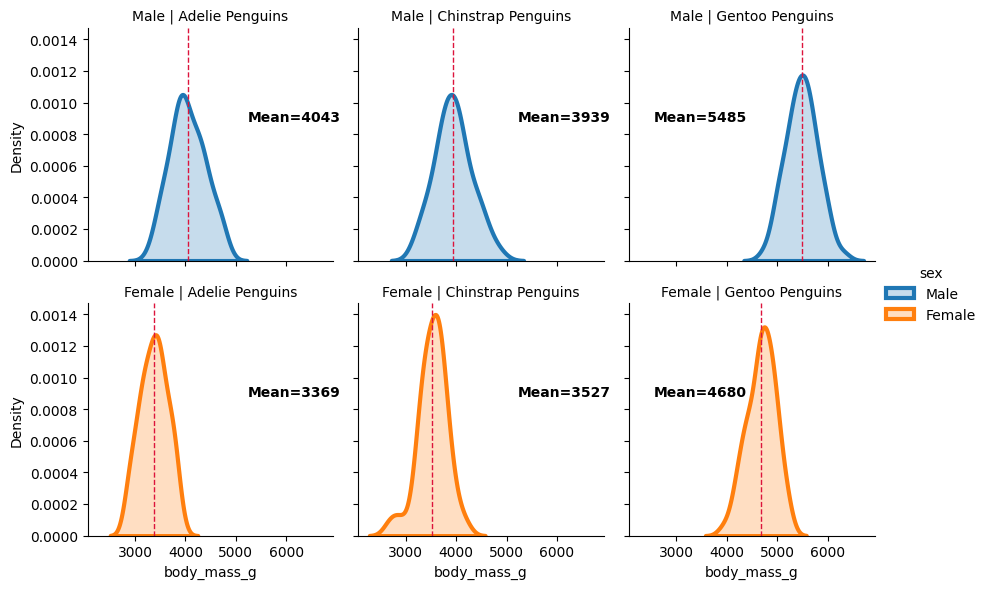

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#this function plots a mean line for each group and displays it for the given kde plots

penguins = sns.load_dataset("penguins")

def add_mean_line(data, var=None, **kws): 
    # If there is no variable, then the function is returned 
    if not var: return
    mean_ = np.mean(data[var])
    #Get current axis
    ax = plt.gca()
    #add line at group mean
    ax.axvline(mean_, color='crimson',linestyle='--',linewidth=1)
    #annotate group mean
    x_pos=0.65
    if mean_ > 4500: x_pos=0.1
    ax.text(x_pos, 0.6, f'Mean={mean_:.0f}', 
            transform=ax.transAxes,     #this ensures that the position for the text is taken relative to the axes and not to the data
            color='k', fontweight='bold', fontsize=10)

p = sns.FacetGrid(penguins, row='sex', col='species',hue='sex')
p.map_dataframe(sns.kdeplot, x='body_mass_g', lw=3, fill=True)
p.map_dataframe(add_mean_line, var='body_mass_g')
p.set_titles(row_template='{row_name}', col_template='{col_name} Penguins')
p.add_legend()

3. $Plotting$ $pair$ $wise$ $data$ $relationships$ $using$ $PairGrid$

*Unlike Facetgrid, where each plot shows the same relationship along different levels of variable in rows and columns in the same plot type. PairGrid allows you to see plot with different relationships, like in a matrix where the relationship is decided by the given row and column. The allows you to get a quick summary of the relationship between two variables in a scattered way.

Below is the working code for the above theory.

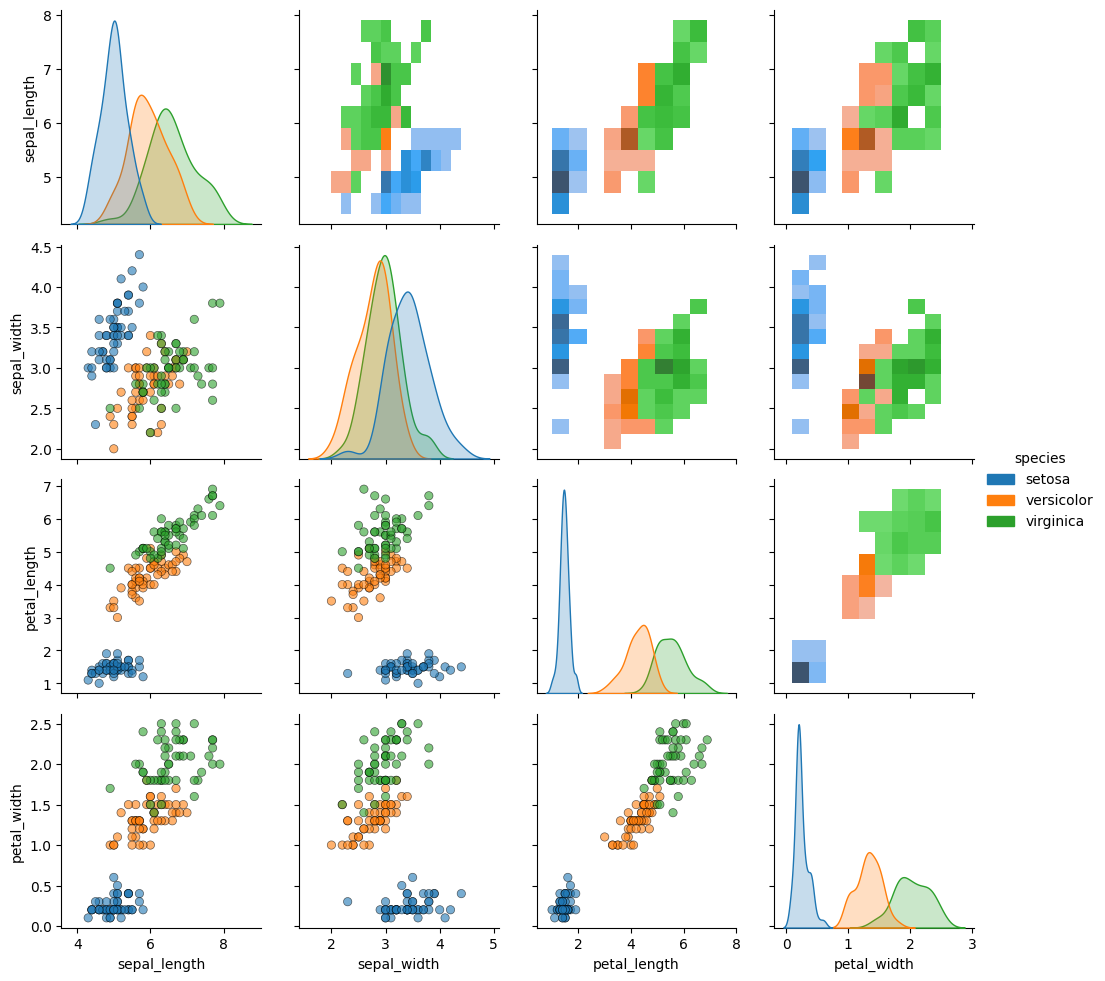

In [4]:
import seaborn as sns
iris = sns.load_dataset("iris")
i = sns.PairGrid(iris, hue='species', diag_sharey=False)
i.map_diag(sns.kdeplot,fill=True) #only plots in the diagonal of the grid
i.map_lower(sns.scatterplot,alpha=0.6,ec='k') #only plots in the  lower triangle of the grid
i.map_upper(sns.histplot) #only plots in the  upper triangle of the grid
i.add_legend()



Pairgrid allows us to have different plots at different locations in our grid. PairGrid also result in the diagonal elements of the grid having the same variables on the x ans y axis. Seaborn can interpret this as a univariant data and allow us to plot univariant plots like histplot, KDE plots, etc. Another consequence of this is that there are mirrored elements in the upper and lower part of the diagonal of the grid.

## 4. Use Cases

Facetgrid is mainly used in those cases where comparative visualizations are required and the data is divided into different categories. Its main purpose is to simplify multi - category analysis. Some of the fields in which the use of FacetGrid may arise are:

1. Medical & Healthcare Data Analysis
2. Financial Data and Analysis of Stocks
3. Data analytics which will be used for marketing
4. Scientific Research and Experimental Data
5. Sports analytics (See the movie: Moneyball)
6. Environmental and Climate Analytics

Which are all data - intensive fields where a lot of data is to be processed, and simple observations and correlations may make a world of difference in any kind of variable. This is why FacetGrid is very powerful in analytics. It's free visualization!

## 5. Concluding Remarks

So, as the sun sets on this introduction, we have learnt about the installation of FacetGrid on various platforms, key features and their explanations with working code which included Conditional Multiplots, Custom Functions, and PairGrid for Pairwise Relationships. We also saw how FacetGrid is used in areas which are data - rich like stocks, sports and market analytics to visualize and make correlations. To sign off, it simplifies multi - category analysis which make datasets more interpretable and insightful.

# 

## 6. References and Further Reading

1. https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
2. http://youtube.com/watch?v=V_a0-1lU4AU
3. https://www.youtube.com/watch?v=D4qN59vnSx0
4. https://www.youtube.com/watch?v=vMNNOwriAbQ